In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

In [3]:
dataset = fetch_ucirepo(id = 891)
x = dataset.data.features
y = dataset.data.targets
df = pd.concat([x,y], axis=1)
print(dataset.metadata)
print(dataset.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [4]:
df.shape

(253680, 22)

In [5]:
df.groupby(['Diabetes_binary']).size()

,0
Diabetes_binary,
0,218334
1,35346


In [6]:
haveDiabetes =  df['Diabetes_binary']==1
data_1 = df[haveDiabetes]
noDiabetes =  df['Diabetes_binary']==0
data_0 = df[noDiabetes]

noDiabetes_rand = data_0.take(np.random.permutation(len(data_0))[:35346])
balanceData = pd.concat([noDiabetes_rand, data_1], ignore_index=True)

In [7]:
balanceData.groupby(['Diabetes_binary']).size()

,0
Diabetes_binary,
0,35346
1,35346


In [8]:
balanceData.shape

(70692, 22)

In [9]:
balanceData.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.566231,0.527514,0.974778,29.857395,0.474594,0.062270,0.148249,0.704054,0.614666,0.789227,...,0.093957,2.839600,3.745219,5.798747,0.253763,0.455002,8.604736,4.925663,5.703998,0.500000
std,0.495598,0.499246,0.156800,7.155285,0.499358,0.241647,0.355349,0.456470,0.486677,0.407861,...,0.291771,1.111667,8.161393,10.046516,0.435167,0.497975,2.847576,1.029494,2.176406,0.500004
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,0.500000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [10]:
balanceData[(balanceData['HighBP'] == 0) & (balanceData['Diabetes_binary'].isin([0, 1]))]['Diabetes_binary'].value_counts()
balanceData[(balanceData['HighBP'] == 1) & (balanceData['Diabetes_binary'].isin([0, 1]))]['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
1,26604
0,13424


In [11]:
Check_BMI = df[df['BMI']>30]
Check_BMI['Diabetes_binary'].value_counts()[[0,1]]

,count
Diabetes_binary,
0,55043
1,18235


In [12]:
Check_BMI = balanceData[balanceData['BMI']==20]
Check_BMI['Diabetes_binary'].value_counts()[[0,1]]

,count
Diabetes_binary,
0,950
1,241


In [13]:
balanceData[(balanceData['HighChol'] == 0) & (balanceData['Diabetes_binary'].isin([0, 1]))]['Diabetes_binary'].value_counts()
balanceData[(balanceData['HighChol'] == 1) & (balanceData['Diabetes_binary'].isin([0, 1]))]['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
1,23686
0,13605


In [14]:
balanceData[(balanceData['PhysActivity'] == 0) & (balanceData['Diabetes_binary'].isin([0, 1]))]['Diabetes_binary'].value_counts()
balanceData[(balanceData['PhysActivity'] == 1) & (balanceData['Diabetes_binary'].isin([0, 1]))]['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0,27484
1,22287


FEATURE SELECTION

there are 21 features, selection must be done based on:
1.   Contribution/corelation to the target
2.   List item


-

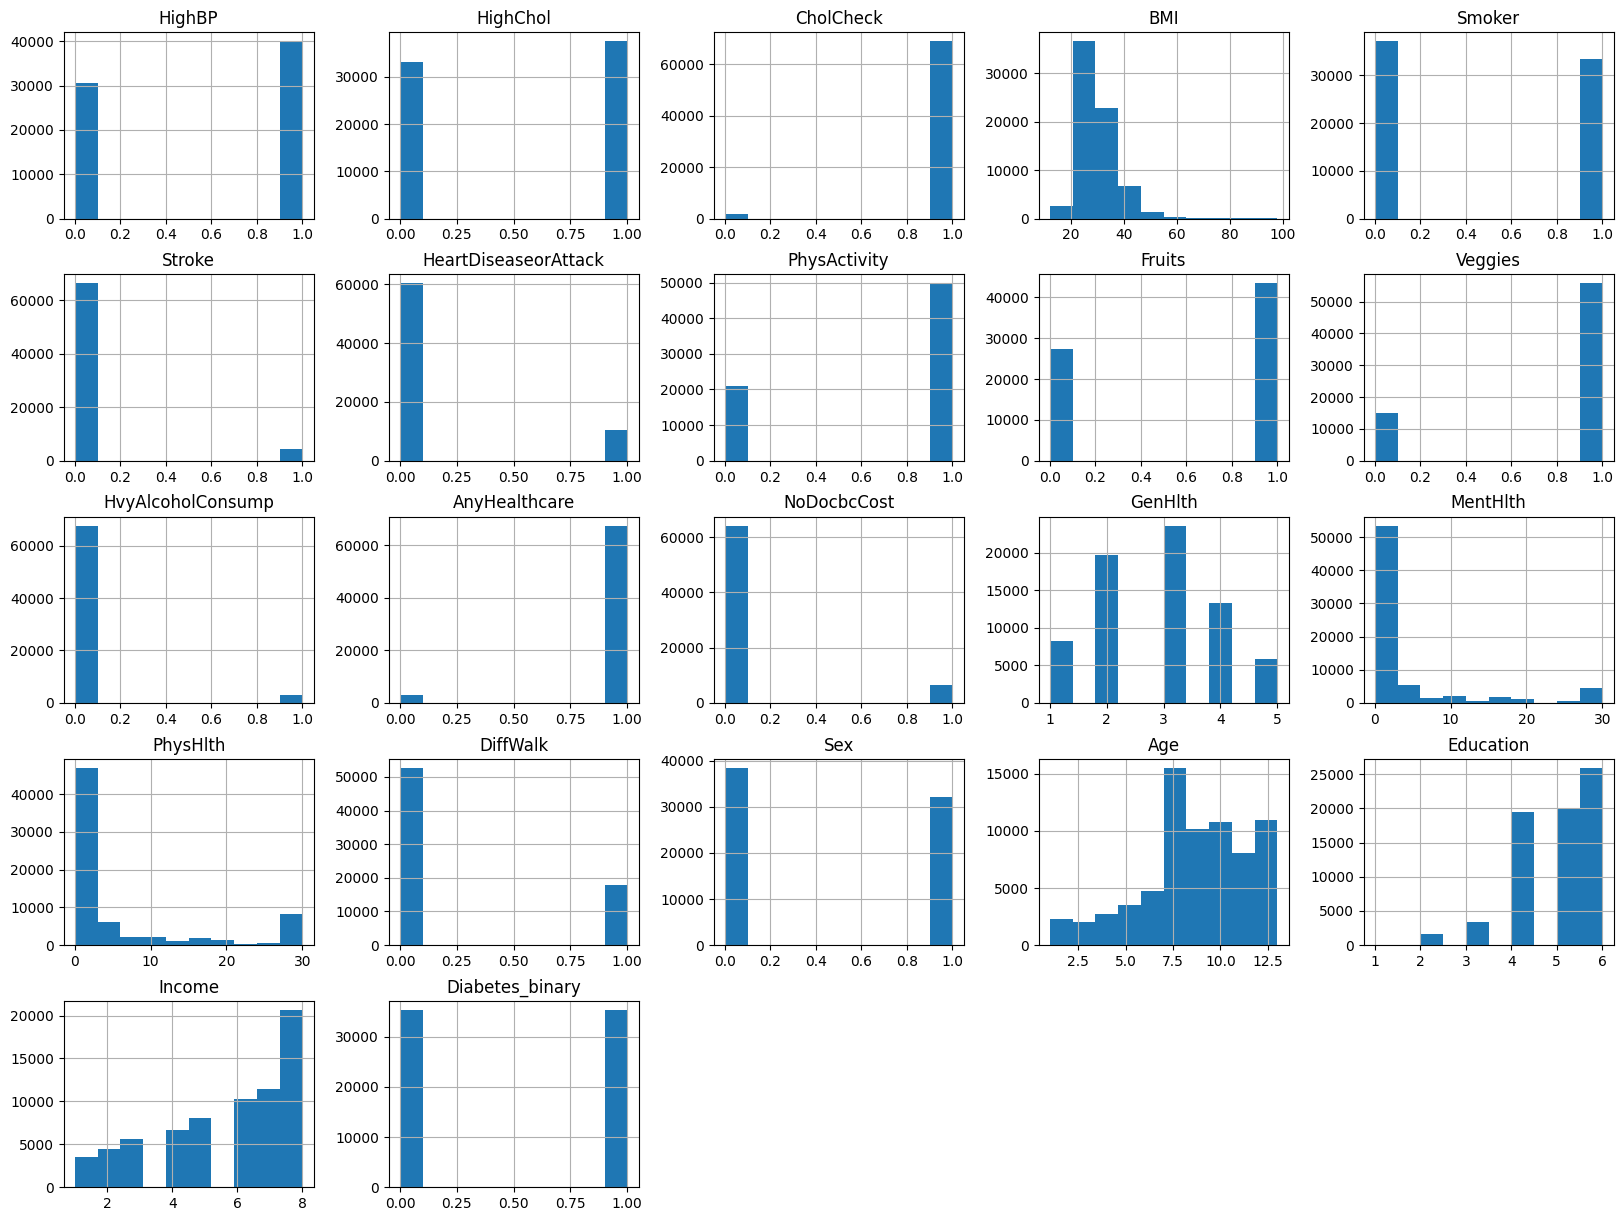

In [16]:
balanceData.hist(figsize=(20, 15))
plt.show()

<Axes: >

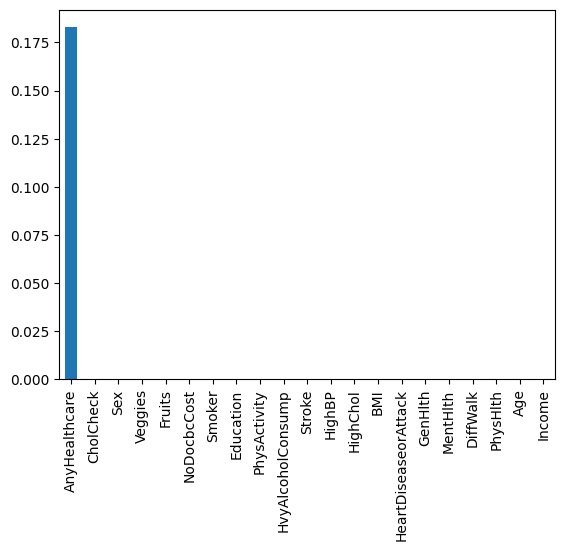

In [15]:
Xlabel = balanceData.drop(columns=['Diabetes_binary'], axis=1)
Ylabel = balanceData['Diabetes_binary']
chi_scores = chi2(Xlabel, Ylabel)
p_values = pd.Series(chi_scores[1], index = Xlabel.columns)
p_values.sort_values(ascending = False, inplace = True)
p_values.plot.bar()

In [16]:
print(p_values.nlargest(21, keep='first'))

AnyHealthcare            1.829473e-01
CholCheck                7.192532e-07
Sex                      1.966902e-21
Veggies                  9.048691e-23
Fruits                   3.722179e-23
NoDocbcCost              5.076963e-25
Smoker                   1.304064e-63
Education               2.680819e-103
PhysActivity            4.970684e-120
HvyAlcoholConsump       1.122017e-124
Stroke                  5.636889e-227
HighBP                   0.000000e+00
HighChol                 0.000000e+00
BMI                      0.000000e+00
HeartDiseaseorAttack     0.000000e+00
GenHlth                  0.000000e+00
MentHlth                 0.000000e+00
DiffWalk                 0.000000e+00
PhysHlth                 0.000000e+00
Age                      0.000000e+00
Income                   0.000000e+00
dtype: float64


<Axes: >

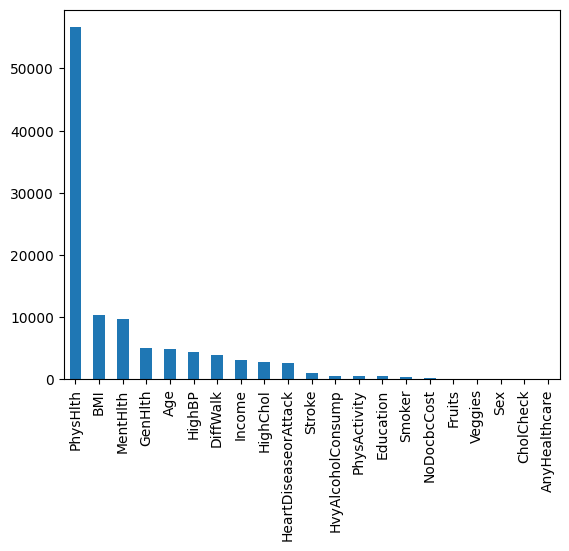

In [17]:
Xlabel = balanceData.drop(columns=['Diabetes_binary'], axis=1)
Ylabel = balanceData['Diabetes_binary']
selected_features = SelectKBest(chi2, k=10).fit(Xlabel, Ylabel)

chi_values = pd.Series(selected_features.scores_, index = Xlabel.columns)
chi_values.sort_values(ascending = False, inplace = True)
chi_values.plot.bar()

In [18]:
print(chi_values.nlargest(21, keep='first'))

PhysHlth                56653.354758
BMI                     10308.680310
MentHlth                 9692.403408
GenHlth                  5072.230237
Age                      4925.723498
HighBP                   4339.772159
DiffWalk                 3843.012933
Income                   3023.252969
HighChol                 2725.230243
HeartDiseaseorAttack     2656.123664
Stroke                   1034.519764
HvyAlcoholConsump         564.020643
PhysActivity              542.661570
Education                 465.760759
Smoker                    283.489001
NoDocbcCost               106.739536
Fruits                     98.231520
Veggies                    96.472613
Sex                        90.378517
CholCheck                  24.562844
AnyHealthcare               1.773518
dtype: float64


In [20]:
best_features = chi_values[chi_values > 500].index.tolist()
best_features.append('Diabetes_binary')
#best_features.to_csv('Diabetes_dataset.csv')

In [23]:
selected_dataset = balanceData[best_features]
selected_dataset.head()

,PhysHlth,BMI,MentHlth,GenHlth,Age,HighBP,DiffWalk,Income,HighChol,HeartDiseaseorAttack,Stroke,HvyAlcoholConsump,PhysActivity,Diabetes_binary
0,0,23,0,1,13,0,0,5,0,0,0,0,1,0
1,0,27,0,1,8,1,0,4,1,0,0,0,1,0
2,0,26,0,3,4,0,0,3,0,0,0,0,1,0
3,6,29,0,3,13,1,0,4,1,0,0,0,1,0
4,0,24,10,2,11,0,0,2,0,0,1,0,1,0


In [25]:
selected_dataset.shape

(70692, 14)

In [26]:
selected_dataset.to_csv('Diabetes_dataset.csv')